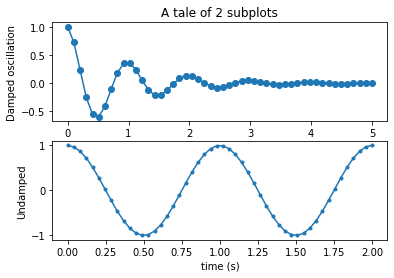

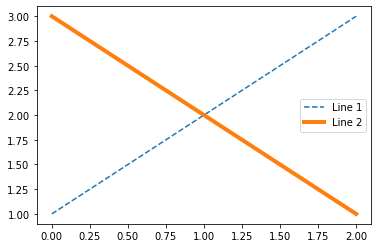

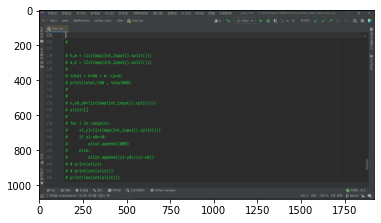

[]
[]
[]
[]


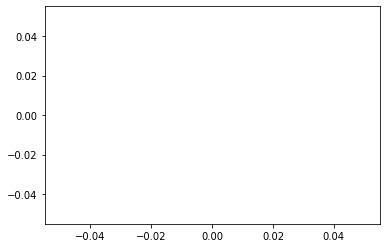

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

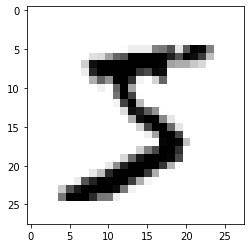

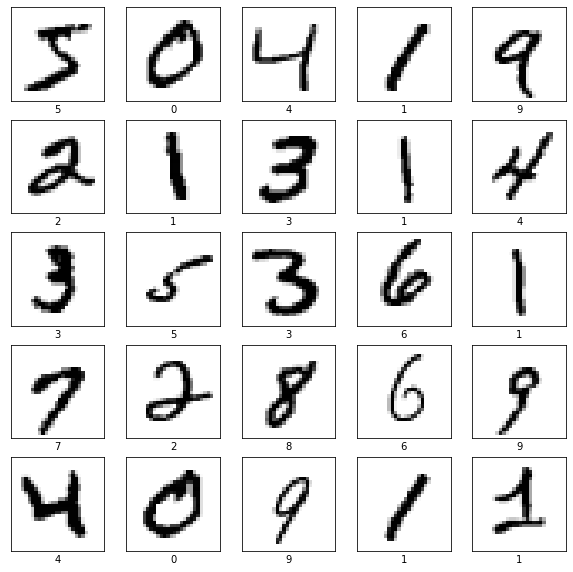

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2826 - accuracy: 0.9188 - val_loss: 0.1700 - val_accuracy: 0.9519

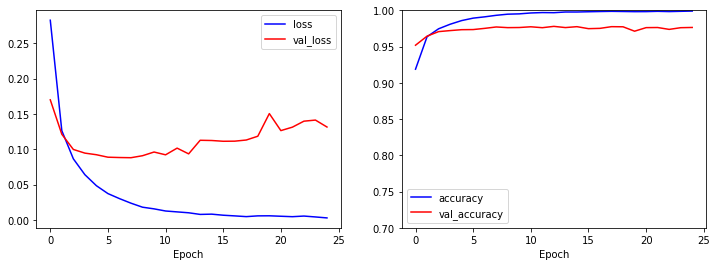

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#Multiple subPlot
x1 = np.linspace(0.0, 5.0)  #균일 간격 점을 생성합니다.
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)  #2행 1열 중 1
plt.plot(x1, y1, '-o')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.show()

plt.plot([1, 2, 3], label="Line 1", linestyle='--')
plt.plot([3, 2, 1], label="Line 2", linewidth=4)
plt.legend()
plt.show()

import matplotlib.image as mpimg

img = mpimg.imread('image1.png')
plt.imshow(img)
plt.show()

#대기오염정보 추출
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request as ulib

url = 'http://apis.data.go.kr/B553077/api/open/sdsc/storeZoneOne?key=573&ServiceKey=WOzprckSsxxf0A0wnoJeR2wQ9oJovl9EsCWUyU2nRCeoL6WipjDVBmB8zdxYJ1UKObKj2KLJ%2BB64OzmWyb4AkA%3D%3D'

res = ulib.urlopen(url)
air = BeautifulSoup(res, "html.parser")

df1 = []
df2 = []
for item in air.findAll("item"):
    for stationname in item.findAll("stationname"):
        # print(stationname.string)
        df1.appned(stationname.string)
    for pm10value in item.findAll("pn10value"):
        df2.append(pm10value.string)
print(df1)
print(df2)
df = pd.DataFrame({'측정소': df1, 'pm10': df2}, )
df.head()

url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?serviceKey=dbF5RsIKFOsDPuvMKWK5sL%2F15rKghkmmWovFeVmUxyzZv9vaMH%2Fzeulk7mHmegmzbC7gA%3D%3D&returnType=xml&numOfRows=10&pageNo=1&stationName=%ED%98%B8%EC%95%94%EB%8F%99&dataTerm=DAILY&ver=1.0'

res = ulib.urlopen(url)
air = BeautifulSoup(res, "html.parser")
df1 = []
df2 = []
for item in air.findAll("item"):
    for datatime in item.findAll("datatime"):
        #print(datatime.string)
        df1.append(datatime.string)
    for pm10value in item.findAll("pm10value"):
        #print(pm10value.string)
        df2.append(pm10value.string)
print(df1)
print(df2)
df = pd.DataFrame({'시간': df1, 'pm10': df2}, )
df.head()

plt.plot(df1, list(map(int, df2)), 'r--')
plt.show()

#인공신경망 동작
# 가중치 갱신
#   인공신경망의 학습은 가중치를 갱신하는 과정
#   오차는 학습데이터의 정답과 출력간의 차이입니다.
#   중간 노드의 가중치 갱신을 위하여 역전파 기법을 사용합니다.

import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

class_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

x_train.shape

#이미지 데이터 출력
print(x_train[0])

#훈련 데이터의 레이블
y_train

#테스트 데이터 구조
x_test.shape

#훈련 데이터 이미지 출력
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

#데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[y_train[i]])
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, batch_size=32, epochs=25, validation_split=0.2)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r-',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-',label='accuracy')
plt.plot(history.history['val_accuracy'],'r-',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()

#dropOut레이어 추가
model  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])
